In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img

warnings.filterwarnings('ignore')

In [61]:
input_path = []
label = []

for cls in os.listdir("Data"):
  for path in os.listdir(os.path.join("Data", cls)):
    if cls == 'Normal':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("Data", cls, path))
  print(input_path[0], label[0])

Data/HeatStress/1669874494.1643372.jpg 1
Data/HeatStress/1669874494.1643372.jpg 1


In [60]:
len(label)
len(input_path)

10144

In [110]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac = 1).reset_index(drop=True)
df.head()

,images,label
0,Data/HeatStress/1669874465.0694873.jpg,1
1,Data/HeatStress/1669874468.901297.jpg,1
2,Data/HeatStress/1669874517.9273674.jpg,1
3,Data/HeatStress/1669874731.5570326.jpg,1
4,Data/HeatStress/1669874495.7498686.jpg,1


In [111]:
for i in df['images']:
  if '.jpg' not in i:
    print(i)


In [112]:
df = df[df['images'] != 'Data/HeatStress/Thumbs.db']
df = df[df['images'] != 'Data/Normal/Thumbs.db']
df = df[df['images'] != 'Data/HeatStress/11702.jpg']
df = df[df['images'] != 'Data/Normal/666.jpg']

len(df)

10144

In [113]:
import PIL

l = []

for image in df['images']:
  try:
    img = PIL.Image.open(image)
  except Exception as e:
    l.append(image)

l


[]

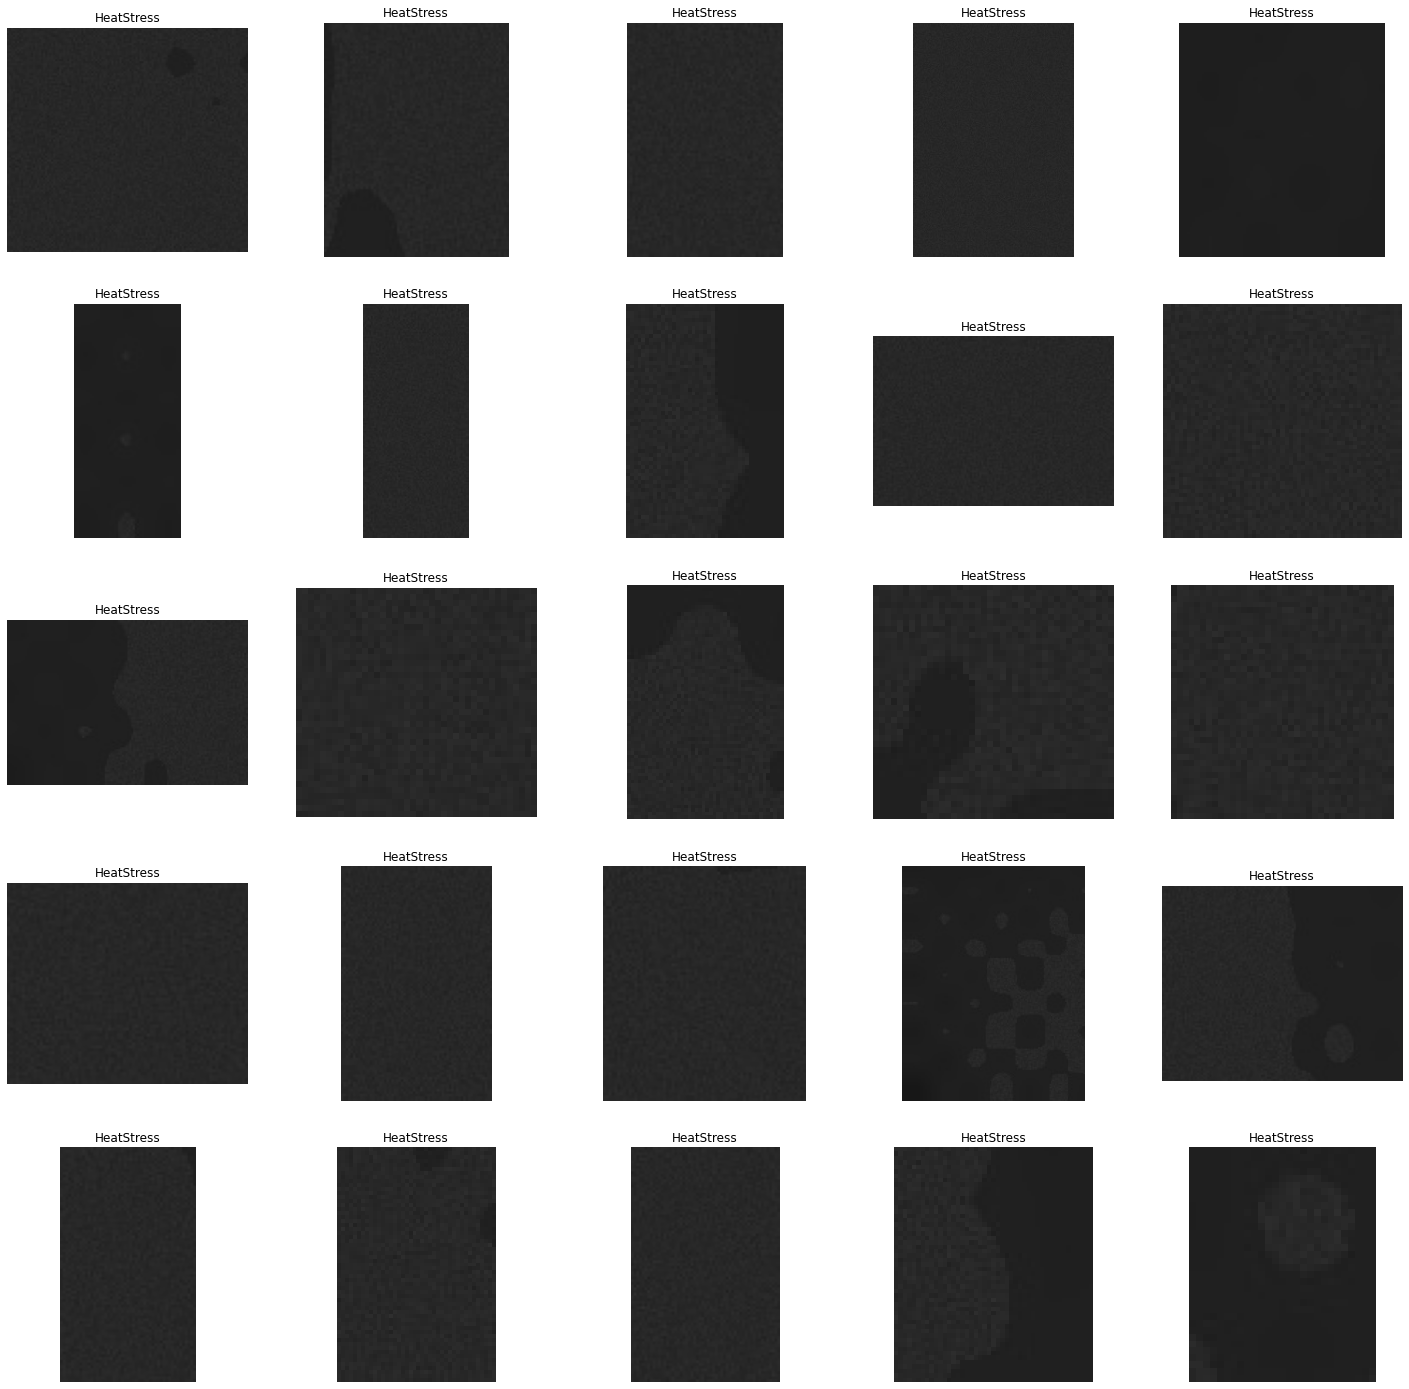

In [114]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('HeatStress')
  plt.axis('off')
plt.savefig("HeatStress Figures.jpg")
  

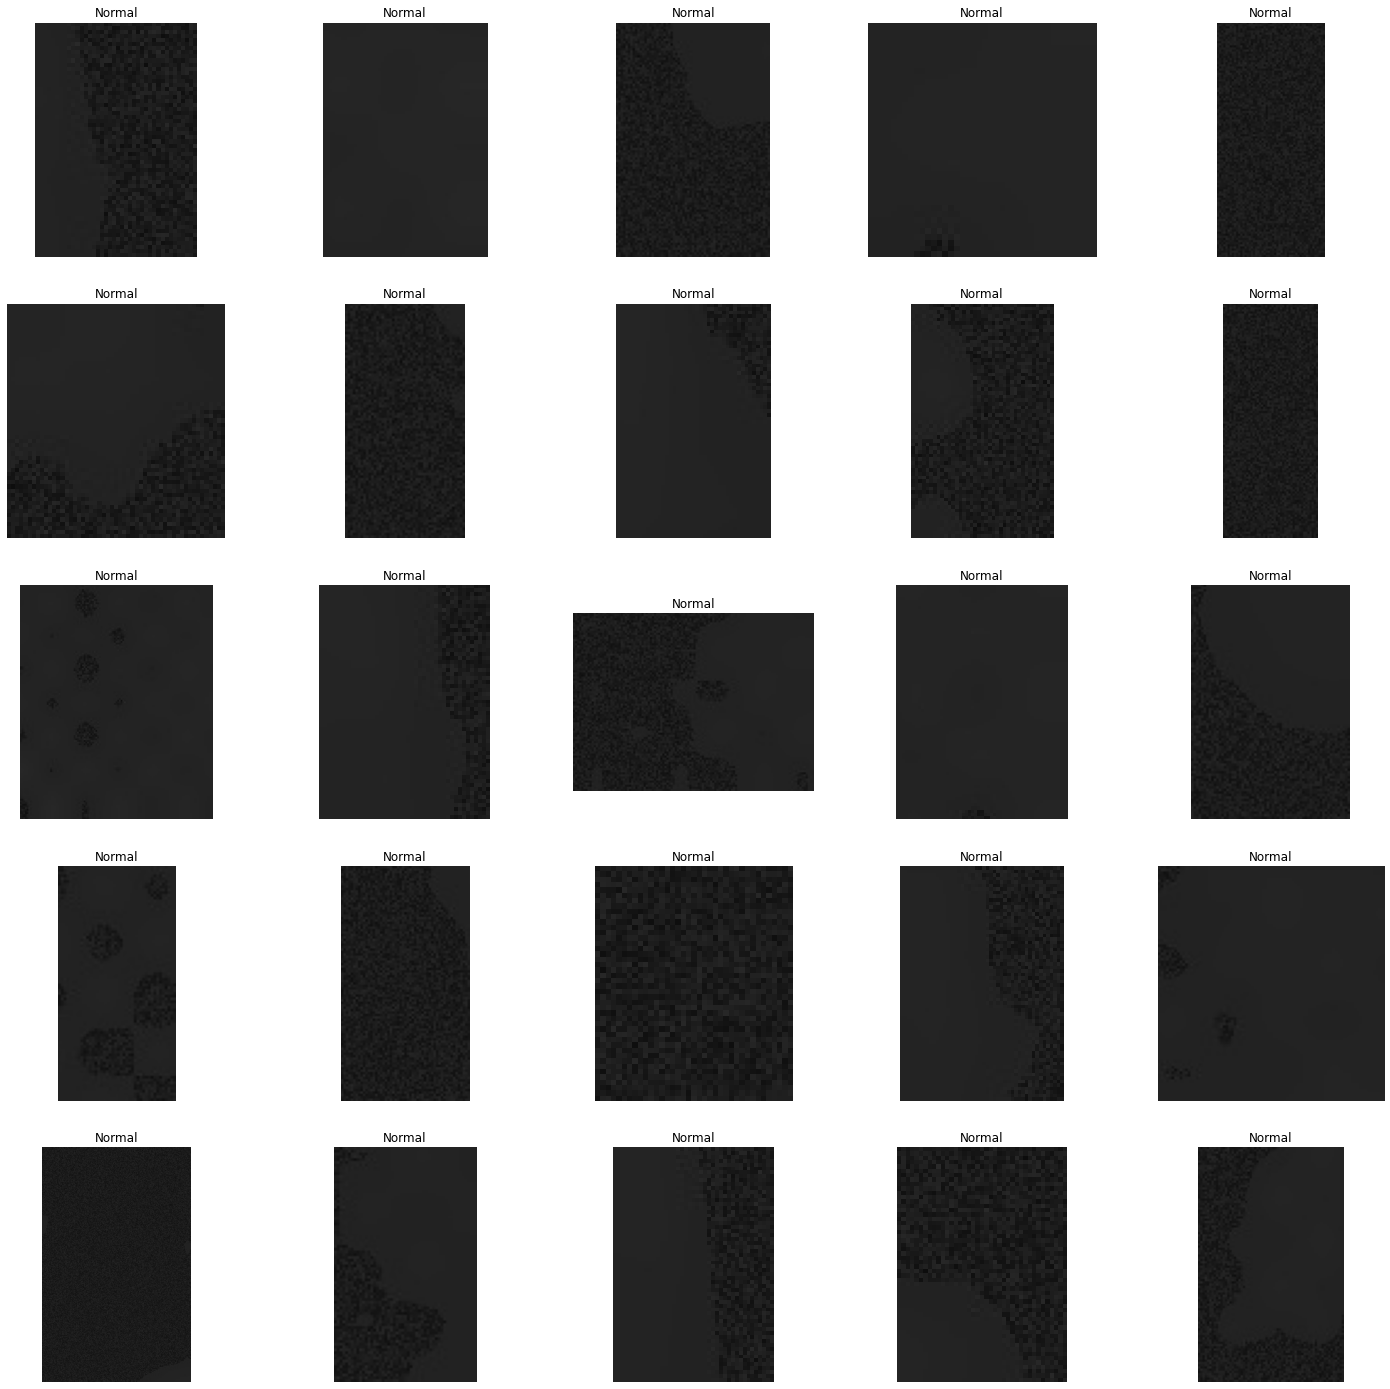

In [115]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Normal')
  plt.axis('off')
plt.savefig("Normal Figures.jpg")

In [ ]:
import seaborn as sns
sns.countplot(df['label'])


In [59]:
df['label'] = df['label'].astype('str')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

train.head()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_generator=ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=True,
    fill_mode='nearest'
)


val_generator = ImageDataGenerator(
    rescale=1./255
)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary',
    color_mode="grayscale",
    
    )

val_iterator = train_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary',
    color_mode="grayscale",
    
    )

print(tf.shape(val_iterator.next()[0]))

In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, sigmoid, softmax, tanh
from tensorflow.keras.layers import  Activation, Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, MaxPool2D,Dropout, Add, AveragePooling2D
from tensorflow.keras.metrics import Recall, Accuracy, Precision
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, LearningRateScheduler,  ReduceLROnPlateau, TensorBoard
from tensorflow.keras.utils import plot_model


def mai_Net():
    model = tf.keras.models.Sequential([
                                        Conv2D(16, (2,2), activation='relu', input_shape=(128,128, 1)),
                                        MaxPool2D((2,2)),
                                        Conv2D(32, (2,2), activation='relu'),
                                        MaxPool2D((2,2)),
                                        Conv2D(64,(3,3), activation='relu'),
                                        MaxPool2D((2,2)),
                                        Flatten(),
                                        Dense(512, activation='relu'),
                                        Dense(1, activation='sigmoid')
    ])

    return model

model = mai_Net()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
#@title
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

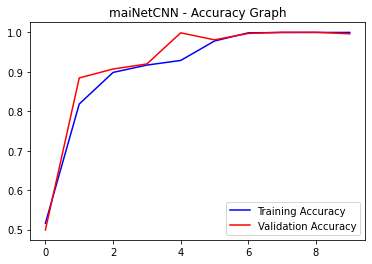

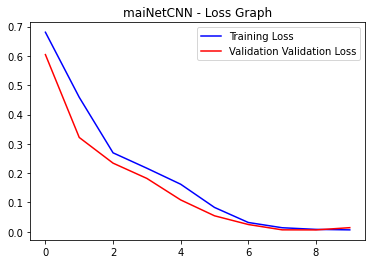

<Figure size 432x288 with 0 Axes>

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc,'b', label='Training Accuracy')
plt.plot(epochs, val_acc,'r', label='Validation Accuracy')
plt.title('maiNetCNN - Accuracy Graph')
plt.legend()
plt.figure()
plt.savefig("maiNetCNN - Accuracy Graph.jpg")

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss,'b', label='Training Loss')
plt.plot(epochs, val_loss,'r', label='Validation Validation Loss')
plt.title('maiNetCNN - Loss Graph')
plt.legend()
plt.figure()
plt.savefig("maiNetCNN - Loss Graph.jpg")

In [ ]:
model.save('zalvenmainet.h5')

In [ ]:
def conv_img(img):
    # rescale to big to ensure enough pixel data
    height, width = img.shape[:2]
    img = cv2.resize(img, (640, 480), interpolation = cv2.INTER_CUBIC)
    img = cv2.resize(img, (120, 120)) /255.
    return np.array(img).reshape(-1, 120, 120, 1)



In [99]:
import numpy as np
import cv2

paths=["testNormal", "testHeatStress"]
targ = 1
target = os.listdir(paths[targ])
classes = ["NormalDesu", "HeatStress"]

for img in target:
    full_path = os.path.join(paths[targ],img )
#     numpy image -> keras image tensor
#     img = tf.keras.preprocessing.image.load_img(full_path, target_size=(128, 128), color_mode='grayscale')
    img = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)
    img_tensor /= 255. 
    print(img_tensor.shape)
    
    res = model.predict(np.array(img_tensor).reshape(-1, 128, 128, 1))
    sres = np.squeeze(res)
    rsres = round(float(sres))
    print(classes[rsres])
#     arged = np.argmax(res)
#     result = classes[np.argmax(np.squeeze(res))]
#     print(f" Model Result -> {result}")

    
# for img in normal:
#     imgg = cv2.imread(os.path.join("testNormal",img), cv2.IMREAD_GRAYSCALE)
#     imgg = cv2.resize(imgg, (128, 128))/255.0
#     res = model.predict(np.array(imgg).reshape(-1, 128, 128, 1))

#     result = classes[np.argmax(np.squeeze(res))]
# #     if res[0][0] > .50: result = "HeatStress"
# #     else: result = "Normal"
    
#     print(f"Totest -> {img}, Model Result -> {np.argmax(np.squeeze(res))}, Identification -> {result}")


(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
NormalDesu
(128, 128, 1)
NormalDesu
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
NormalDesu
(128, 128, 1)
HeatStress
(128, 128, 1)
NormalDesu
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
NormalDesu
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
NormalDesu
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
NormalDesu
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
(128, 128, 1)
HeatStress
